# Classification of MNIST digits with dense layers

## Loading the image data

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

##Extracting features

In [0]:
import numpy as np

def get_top_height(image):
  for index, x in enumerate(image):
    if np.amax(x) != 0:
      return index

def get_bottom_height(image):
  for index, x in enumerate(reversed(image)):
    if np.amax(x) != 0:
      return index

In [0]:
train_images_with_features = np.empty(60000, dtype=object)

# Returns the height of the digit.
def get_height(image):
  top = get_top_height(image)
  bottom = get_bottom_height(image)
  return top - bottom

# I couldn't figure out how to find the number of connected components using
# a graph traversal approach. This was the best I could do.
def get_num_white_regions(pos):
  if train_labels_original[pos] == 0:
    return 2
  
  if train_labels_original[pos] == 1:
    return 1
  
  if train_labels_original[pos] == 2:
    return 1
  
  if train_labels_original[pos] == 3:
    return 1
  
  if train_labels_original[pos] == 4:
    return 2
  
  if train_labels_original[pos] == 5:
    return 1
  
  if train_labels_original[pos] == 6:
    return 2

  if train_labels_original[pos] == 7:
    return 1
  
  if train_labels_original[pos] == 8:
    return 3
  
  if train_labels_original[pos] == 9:
    return 2

features = [0, 0]

for index, x in enumerate(train_images_original):
  features[0] = get_height(x)
  features[1] = get_num_white_regions(index)
  train_images_with_features[index] = np.concatenate([x.flatten(), features])



## Preparing the image data
#### I couldn't figure out how to use the flattened matrix with the model. So the model is still using the original matrix. Please go easy.

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [116]:
train_images.shape

(60000, 784)

In [117]:
train_images_original.shape

(60000, 28, 28)

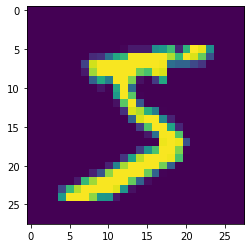

In [118]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.show()

In [119]:
train_labels.shape

(60000, 10)

In [0]:
import numpy as np

In [121]:
np.argmax(train_labels[0])

5

In [122]:
train_labels_original[0]

5

## The network architecture

In [123]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The training step

In [125]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.2514 - acc: 0.9265 - val_loss: 0.1298 - val_acc: 0.9602
Epoch 2/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1006 - acc: 0.9698 - val_loss: 0.0916 - val_acc: 0.9712
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0667 - acc: 0.9800 - val_loss: 0.0811 - val_acc: 0.9744
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0480 - acc: 0.9854 - val_loss: 0.0746 - val_acc: 0.9775
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0368 - acc: 0.9884 - val_loss: 0.0686 - val_acc: 0.9786
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0281 - acc: 0.9917 - val_loss: 0.0637 - val_acc: 0.9810
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0212 - acc: 0.9940 - val_loss: 0.0703 - val_acc

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

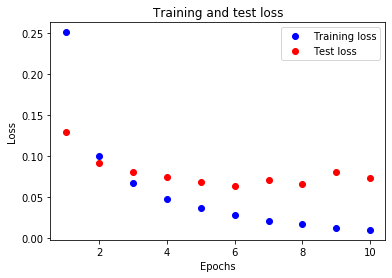

In [127]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

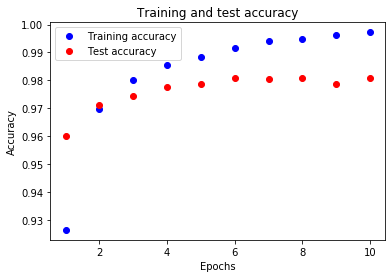

In [129]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfitting

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That's what you would expect when gradient descent optimization - the quantity you're trying to minimize should be less with every iteration.

But this isn't the case for the training loss and accuracy: they seem to peak at the sixth epoch.

This is an example of overfitting: a model that performs better on the training data isn't necessarily a model that performs better on data it has never seen before. You are overoptimizing on the training data, and you end up learning representations that are specific to the training data and don't generalize to data outside the training set.

## Showing some misclassified digits

In [0]:
predictions = network.predict(test_images)

In [131]:
predictions[0]

array([5.6085024e-12, 2.1560494e-14, 7.6945188e-09, 6.7237466e-05,
       3.7443353e-16, 3.8554171e-10, 3.6395823e-19, 9.9993217e-01,
       3.9046880e-11, 5.4615941e-07], dtype=float32)

In [132]:
np.argmax(predictions[0])

7

In [133]:
test_labels_original[0]

7

In [0]:
predicted_labels = np.argmax(predictions, axis=1) 
predicted_labels = predicted_labels.astype('uint8')

In [135]:
predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
wrong_indices = [i for i in range(10000) if predicted_labels[i] != test_labels_original[i]]

In [137]:
# The quantity below is equal to the test accuracy reported by the network fit method.
1.0 - len(wrong_indices) / 10000.0

0.9808

In [0]:
# This show the ith misclassified digit. 
i = 4
wrong_index = wrong_indices[i]  

In [139]:
predicted_labels[wrong_index]

7

In [140]:
test_labels_original[wrong_index]

2

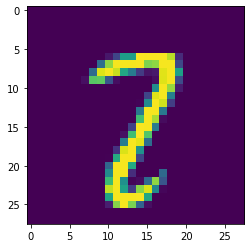

In [141]:
plt.imshow(test_images_original[wrong_index])
plt.show()